In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
 


In [14]:
df = pd.read_csv("Crime Prediction in Chicago_Dataset.csv")

# Exploring the dataset

In [15]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12592454,JF113025,1/14/2022 15:55,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,16.0,68,26,1170805.0,1860170.0,2022,9/14/2023 15:41,41.771782,-87.649437,"(41.771782439, -87.649436929)"
1,12785595,JF346553,8/5/2022 21:00,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,...,5.0,69,17,1185135.0,1857211.0,2022,9/14/2023 15:41,41.763338,-87.597001,"(41.763337967, -87.597001131)"
2,12808281,JF373517,8/14/2022 14:00,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,39.0,11,17,1138383.0,1937953.0,2022,9/14/2023 15:41,41.985875,-87.766404,"(41.985875279, -87.766403857)"
3,12888104,JF469015,11/10/2022 3:47,072XX S MAY ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,...,17.0,68,15,1169903.0,1856822.0,2022,9/14/2023 15:41,41.762615,-87.652840,"(41.76261474, -87.652840463)"
4,13209277,JG422539,8/15/2022 9:00,0000X W JACKSON BLVD,810,THEFT,OVER $500,COMMERCIAL / BUSINESS OFFICE,False,False,...,4.0,32,6,NaN,NaN,2022,9/14/2023 15:43,NaN,NaN,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239558 entries, 0 to 239557
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    239558 non-null  int64  
 1   Case Number           239558 non-null  object 
 2   Date                  239558 non-null  object 
 3   Block                 239558 non-null  object 
 4   IUCR                  239558 non-null  object 
 5   Primary Type          239558 non-null  object 
 6   Description           239558 non-null  object 
 7   Location Description  238593 non-null  object 
 8   Arrest                239558 non-null  bool   
 9   Domestic              239558 non-null  bool   
 10  Beat                  239558 non-null  int64  
 11  District              239558 non-null  int64  
 12  Ward                  239548 non-null  float64
 13  Community Area        239558 non-null  int64  
 14  FBI Code              239558 non-null  object 
 15  

In [17]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [18]:
df = df.drop(columns=['Location', 'Y Coordinate', 'X Coordinate', 'FBI Code','Updated On','Case Number','ID','Year'], axis=1)

In [19]:
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
df.describe()

,Date,Beat,District,Ward,Community Area,Latitude,Longitude
count,239558,239558.000000,239558.00000,239548.000000,239558.000000,234891.000000,234891.000000
mean,2022-07-11 20:58:27.807963136,1154.023276,11.31053,23.385029,36.268474,41.845612,-87.668599
min,2022-01-01 00:00:00,111.000000,1.00000,1.000000,1.000000,36.619446,-91.686566
25%,2022-04-18 14:41:15,533.000000,5.00000,9.000000,22.000000,41.769168,-87.710150
50%,2022-07-17 03:37:30,1033.000000,10.00000,24.000000,32.000000,41.863073,-87.661465
75%,2022-10-06 14:00:00,1731.000000,17.00000,35.000000,53.000000,41.909023,-87.626402
max,2022-12-31 23:55:00,2535.000000,31.00000,50.000000,77.000000,42.022548,-87.524532
std,NaN,707.909870,7.07555,14.210565,21.553814,0.088833,0.061010


In [21]:
df.isnull().sum()

Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     965
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      10
Community Area             0
Latitude                4667
Longitude               4667
dtype: int64

In [22]:
df['Arrest'].value_counts()
#the data is imbalanced, so we can handle it by class weight  method

Arrest
False    211505
True      28053
Name: count, dtype: int64

In [23]:
df.duplicated().sum()

379

### Detecting Outliers

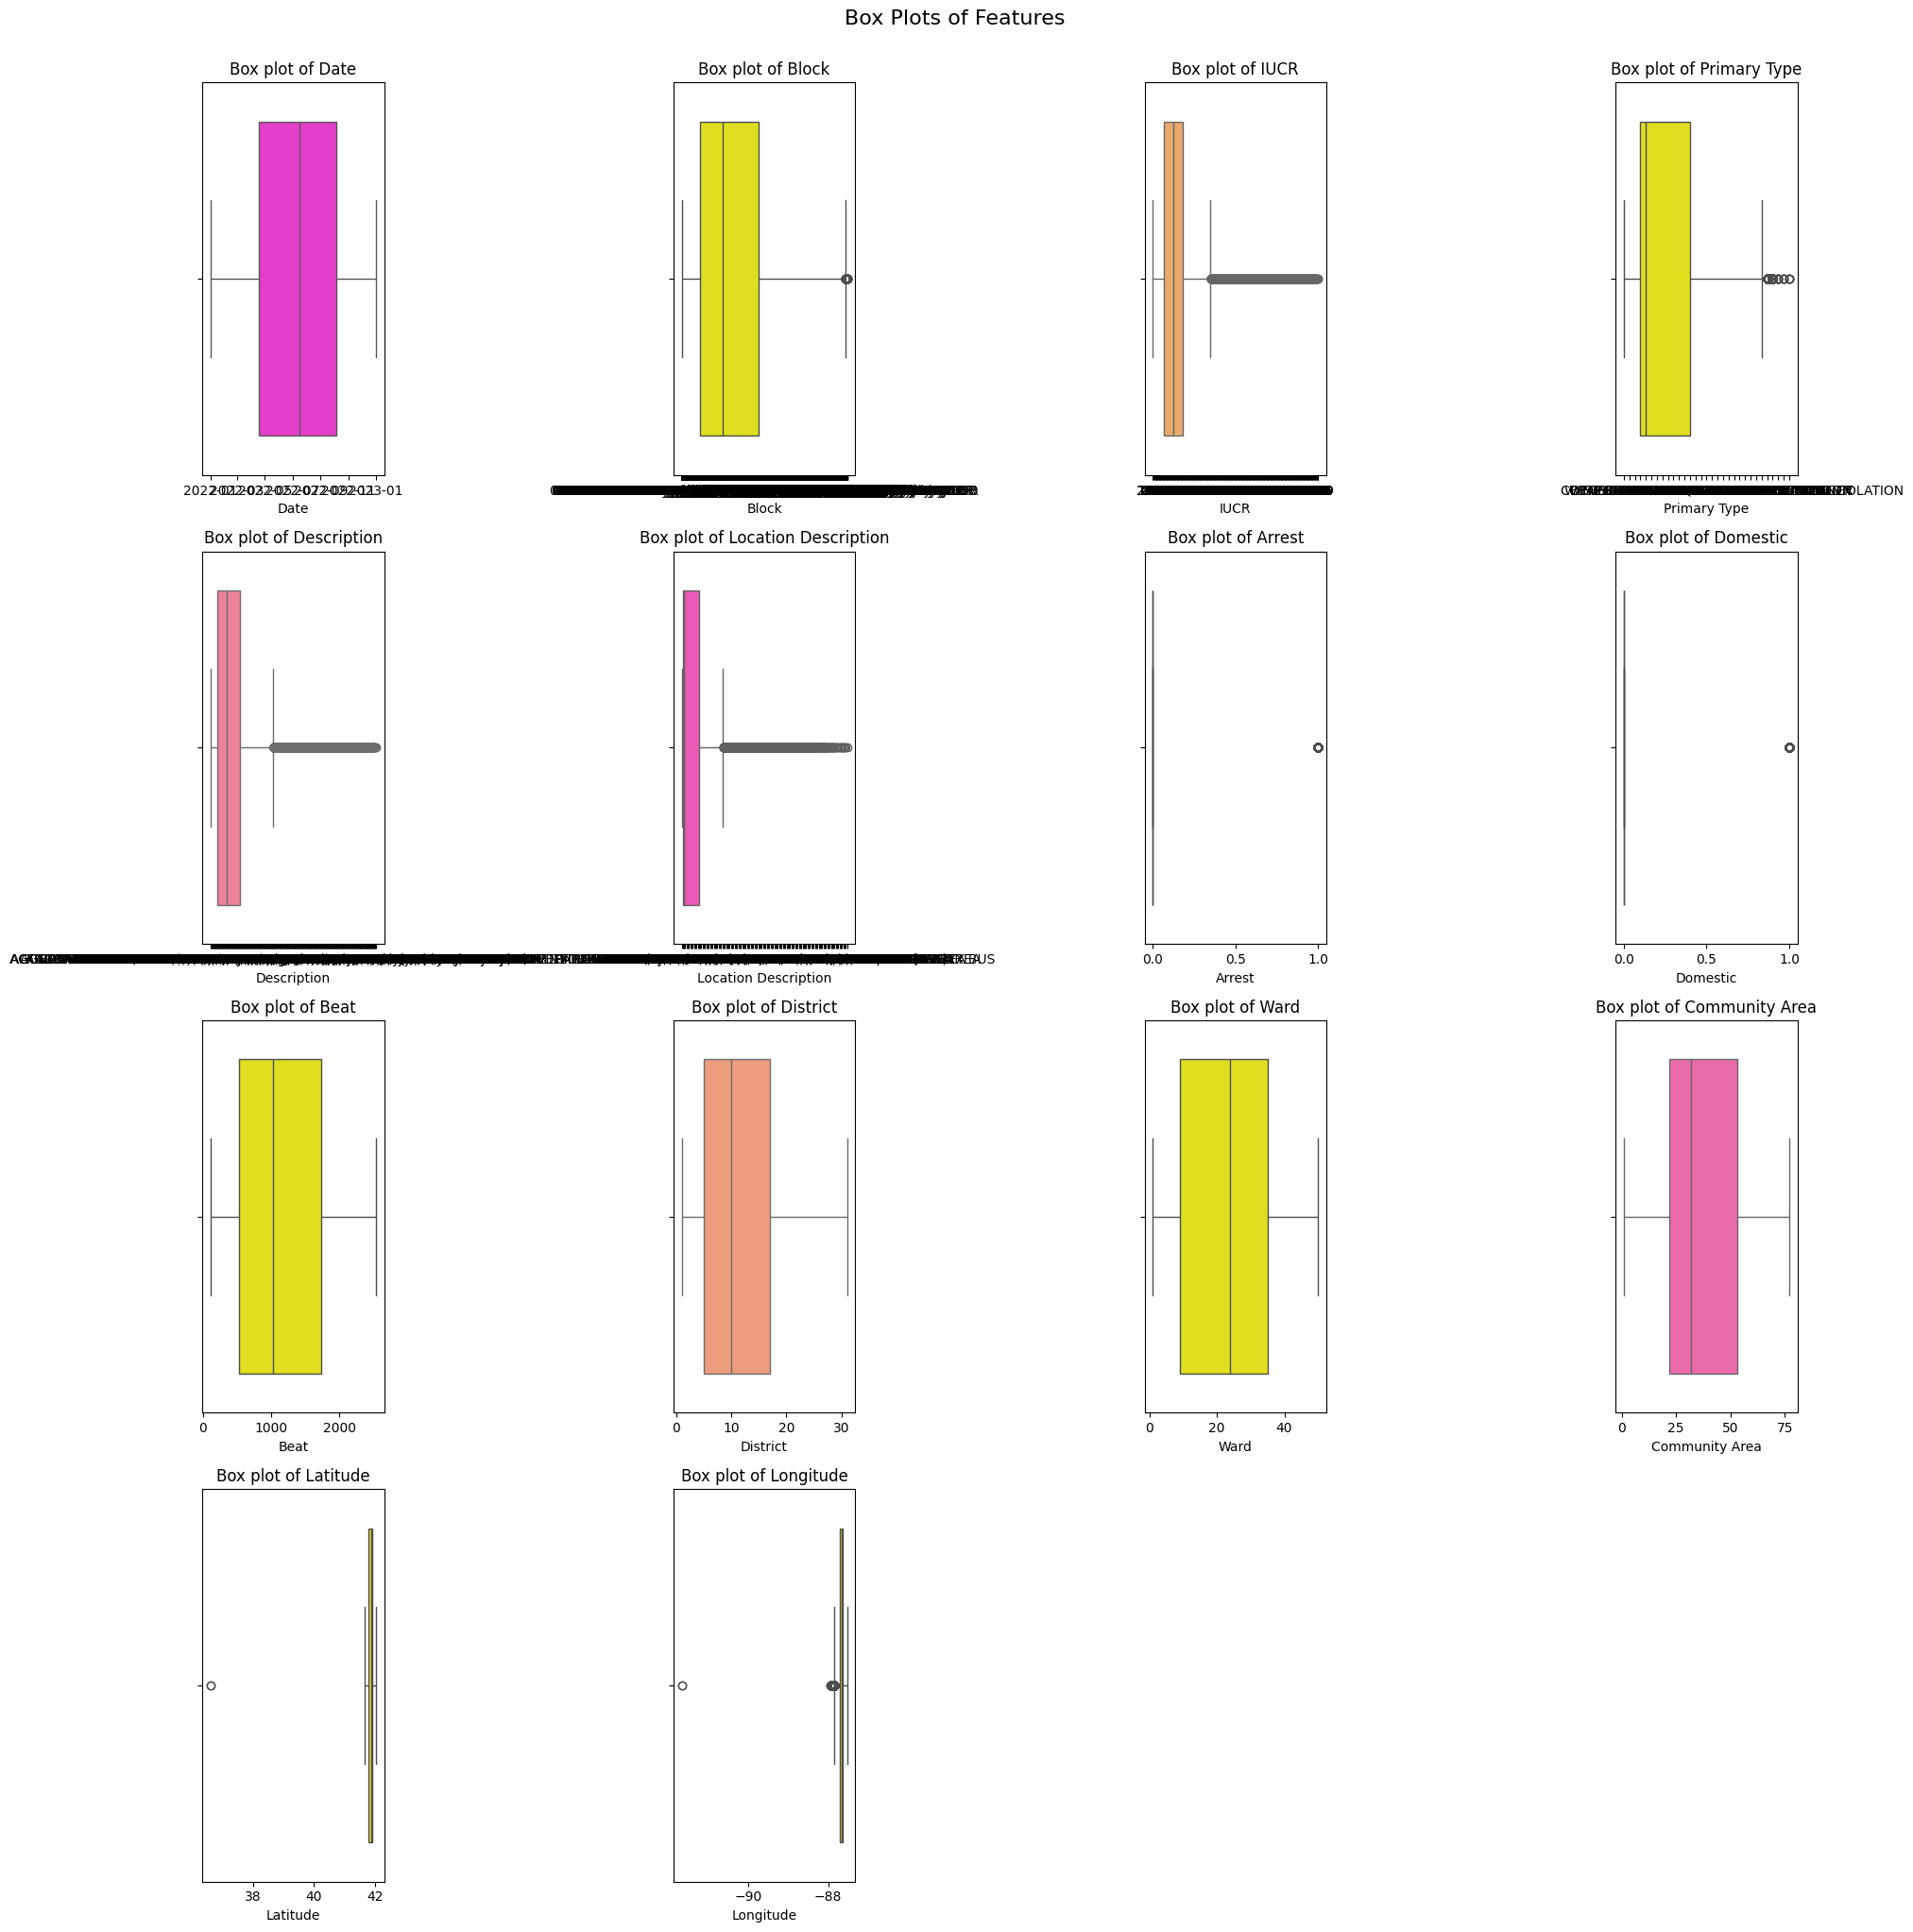

In [24]:
num_colors = 20
indices = np.linspace(0, 400, 1000, dtype=int)
np.random.shuffle(indices)
selected_indices = indices[:num_colors]
colors = [cm.spring(x) for x in selected_indices]
#Box Plot
def print_boxplot(df):
    n = len(df.columns)
    rows = int(np.ceil(n/4))

    fig, axs = plt.subplots(rows, 4, figsize=(20, 5*rows))

    # Flatten the axes array, to make iterating over it easier
    axs = axs.flatten()

    for i, (c, color) in enumerate(zip(df, colors)):
        sns.boxplot(x=df[c],color=color, ax=axs[i])
        axs[i].set_title(f'Box plot of {c}')

    # Remove any unused subplots
    if n % 4:
        for j in range(n, rows*4):
            fig.delaxes(axs[j])

    plt.tight_layout()
    plt.suptitle('Box Plots of Features', x=0.5, y=1.02, fontsize=16)
    plt.show()

print_boxplot(df)

# Data Cleaning

In [25]:
df.dropna()

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Latitude,Longitude
0,2022-01-14 15:55:00,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,724,7,16.0,68,41.771782,-87.649437
1,2022-08-05 21:00:00,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,324,3,5.0,69,41.763338,-87.597001
2,2022-08-14 14:00:00,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,1621,16,39.0,11,41.985875,-87.766404
3,2022-11-10 03:47:00,072XX S MAY ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,733,7,17.0,68,41.762615,-87.652840
5,2022-02-19 10:36:00,010XX N FRANCISCO AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,HOSPITAL BUILDING / GROUNDS,True,True,1211,12,26.0,24,41.900506,-87.699285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239553,2022-09-08 10:50:00,061XX N WINTHROP AVE,110,HOMICIDE,FIRST DEGREE MURDER,PORCH,True,False,2433,24,48.0,77,41.993457,-87.658318
239554,2022-06-10 23:41:00,018XX S CANAL ST,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,1235,12,25.0,31,41.857173,-87.638918
239555,2022-02-03 16:27:00,000XX E 100TH PL,110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,511,5,9.0,49,41.711753,-87.621374
239556,2022-06-23 02:25:00,027XX S KEDVALE AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,1031,10,22.0,30,41.841506,-87.728122


In [26]:
df.drop_duplicates()

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Latitude,Longitude
0,2022-01-14 15:55:00,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,724,7,16.0,68,41.771782,-87.649437
1,2022-08-05 21:00:00,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,324,3,5.0,69,41.763338,-87.597001
2,2022-08-14 14:00:00,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,1621,16,39.0,11,41.985875,-87.766404
3,2022-11-10 03:47:00,072XX S MAY ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,733,7,17.0,68,41.762615,-87.652840
4,2022-08-15 09:00:00,0000X W JACKSON BLVD,810,THEFT,OVER $500,COMMERCIAL / BUSINESS OFFICE,False,False,113,1,4.0,32,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239553,2022-09-08 10:50:00,061XX N WINTHROP AVE,110,HOMICIDE,FIRST DEGREE MURDER,PORCH,True,False,2433,24,48.0,77,41.993457,-87.658318
239554,2022-06-10 23:41:00,018XX S CANAL ST,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,1235,12,25.0,31,41.857173,-87.638918
239555,2022-02-03 16:27:00,000XX E 100TH PL,110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,511,5,9.0,49,41.711753,-87.621374
239556,2022-06-23 02:25:00,027XX S KEDVALE AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,1031,10,22.0,30,41.841506,-87.728122


# Data preprocessing

## Encoding Categorical Features

In [27]:
# Label Encoding
le = LabelEncoder()
df['Arrest'] = le.fit_transform(df['Arrest'])

In [28]:
df['Arrest'].value_counts()

Arrest
0    211505
1     28053
Name: count, dtype: int64

In [29]:
le1 = LabelEncoder()
df['Domestic'] = le1.fit_transform(df['Domestic'])
df['Domestic'].value_counts()

Domestic
0    194642
1     44916
Name: count, dtype: int64

In [30]:
le2 = LabelEncoder()
df['Block'] = le2.fit_transform(df['Block'])
df['Block'].value_counts()

Block
714      604
486      575
26311    342
1458     325
245      276
        ... 
19071      1
448        1
13759      1
9932       1
494        1
Name: count, Length: 27969, dtype: int64

In [31]:
le3 = LabelEncoder()
df['IUCR'] = le3.fit_transform(df['IUCR'])
df['IUCR'].value_counts()

IUCR
284    20112
285    18882
232    18692
293    17151
47     14236
       ...  
79         1
86         1
129        1
44         1
246        1
Name: count, Length: 305, dtype: int64

In [32]:
le4 = LabelEncoder()
df['Location Description'] = le4.fit_transform(df['Location Description'])
df['Location Description'].value_counts()

Location Description
119    67640
17     45748
102    30603
115    12059
94      9333
       ...  
49         1
120        1
123        1
100        1
118        1
Name: count, Length: 136, dtype: int64

In [33]:
le2 = LabelEncoder()
df['Primary Type'] = le2.fit_transform(df['Primary Type'])
df['Primary Type'].value_counts()

Primary Type
29    54886
2     40946
5     27248
16    21463
1     20809
8     16854
22    14609
26     8963
30     8780
3      7593
17     4756
7      4223
20     1870
6      1583
27     1216
10      732
25      711
28      452
0       422
12      392
23      283
15      203
13      184
4       177
14      117
19       47
11       13
9         9
21        7
18        5
24        5
Name: count, dtype: int64

In [34]:
le2 = LabelEncoder()
df['Description'] = le2.fit_transform(df['Description'])
df['Description'].value_counts()

Description
231    27225
183    20112
0      18882
103    18692
68     17151
       ...  
222        1
198        1
12         1
227        1
279        1
Name: count, Length: 285, dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239558 entries, 0 to 239557
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  239558 non-null  datetime64[ns]
 1   Block                 239558 non-null  int32         
 2   IUCR                  239558 non-null  int32         
 3   Primary Type          239558 non-null  int32         
 4   Description           239558 non-null  int32         
 5   Location Description  239558 non-null  int32         
 6   Arrest                239558 non-null  int64         
 7   Domestic              239558 non-null  int64         
 8   Beat                  239558 non-null  int64         
 9   District              239558 non-null  int64         
 10  Ward                  239548 non-null  float64       
 11  Community Area        239558 non-null  int64         
 12  Latitude              234891 non-null  float64       
 13 

## Calculating Correlation Between the Features

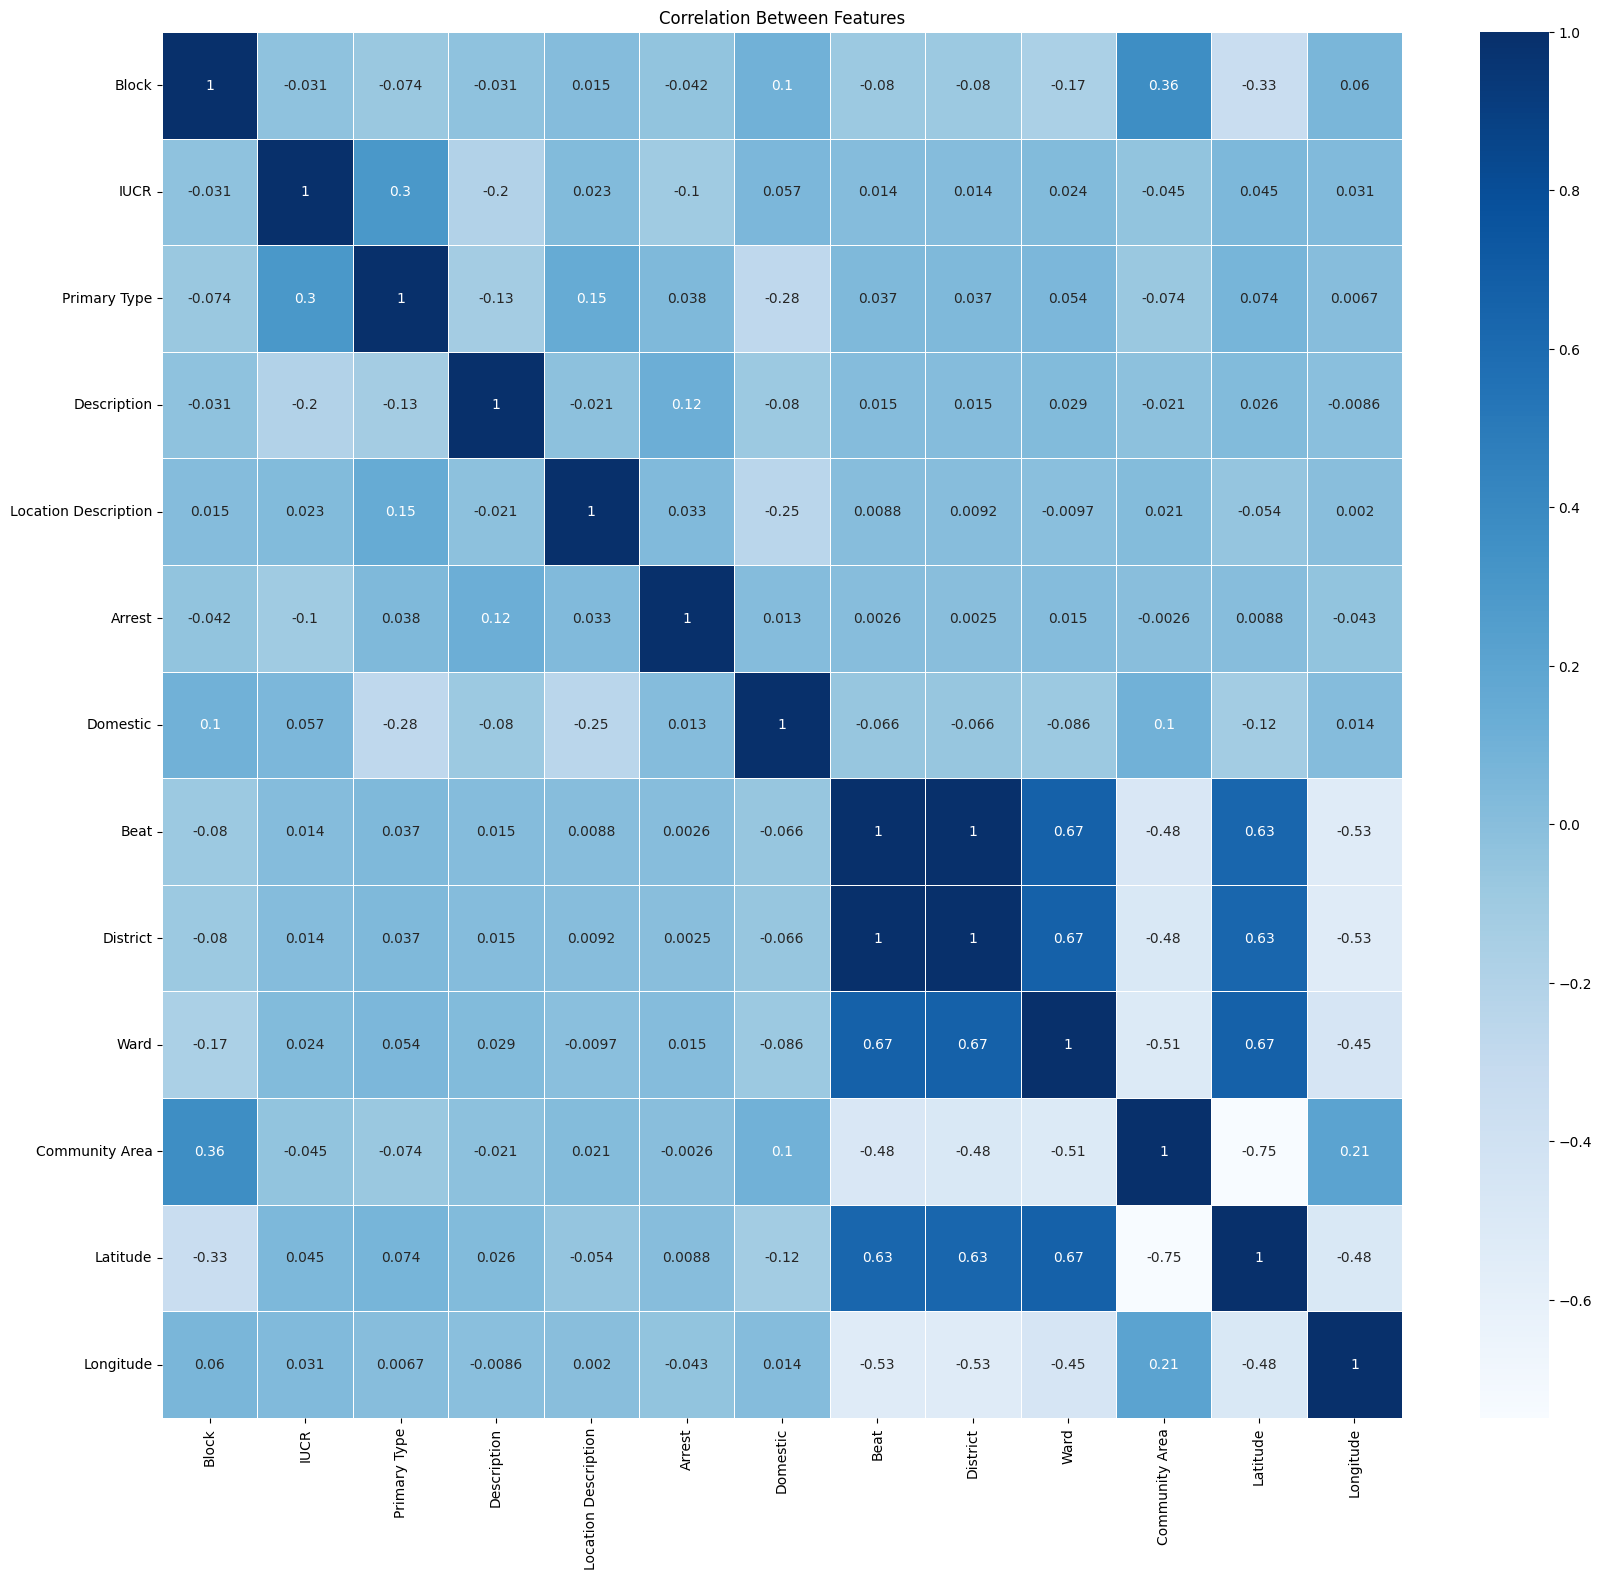

In [36]:
# Make Correlation Matrix to explore the correlation between features
plt.figure(figsize= (20, 18))
sns.heatmap( data = df.select_dtypes(include=np.number).corr() , annot = True , linewidth = 0.5 , cmap='Blues')
plt.title('Correlation Between Features')
plt.show()

## Feature Scaling

In [37]:
# Extract the datetime column
date_col = df['Date']
numerical_cols = df.select_dtypes(include=[np.number])
scaler = MinMaxScaler()
scaled_numerical_df = pd.DataFrame(scaler.fit_transform(numerical_cols), columns=numerical_cols.columns)
df = pd.concat([scaled_numerical_df, date_col], axis=1)

In [38]:
X = df.drop(['Date','Arrest'], axis=1)
y = df['Arrest']

# Models

### Getting Important Features From Random Forest Classifier

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split( X , y , test_size=0.2 , random_state=42 , stratify =y)

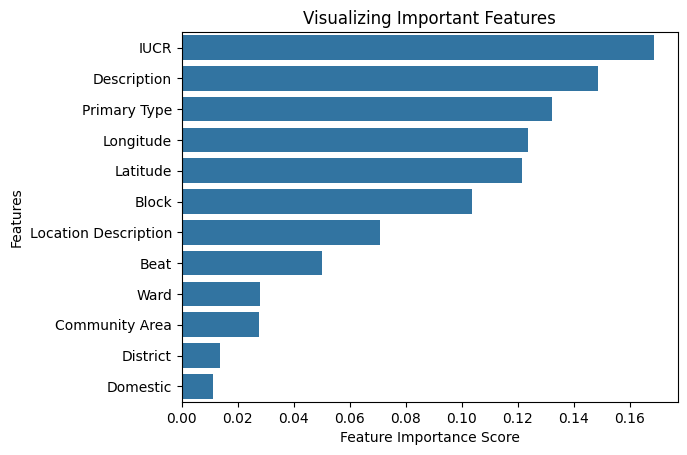

In [40]:
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sorted_features = feature_scores.index
sorted_scores = feature_scores.values
sns.barplot(x=feature_scores, y=feature_scores.index, orient = 'h')
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")
sorted_features
# Visualize the graph
plt.show()

### logistic regression

In [41]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Handle missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train Logistic Regression model
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

Accuracy: 0.6176323259308732
Precision: 0.1716529736991681
Recall: 0.5920513277490643
F1 Score: 0.2661432462746355
ROC-AUC: 0.6520227828407198
Confusion Matrix:
 [[26270 16031]
 [ 2289  3322]]


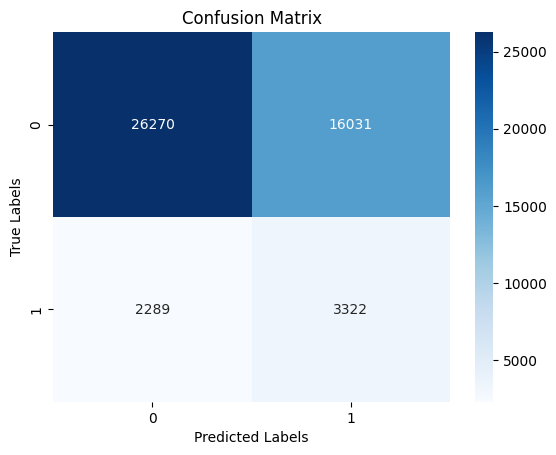

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### decision tree

Decision Tree - Accuracy: 0.92
Decision Tree - Precision: 0.93
Decision Tree - Recall: 0.37
Decision Tree - F1 Score: 0.53
Decision Tree - Confusion Matrix:
[[42146   155]
 [ 3529  2082]]


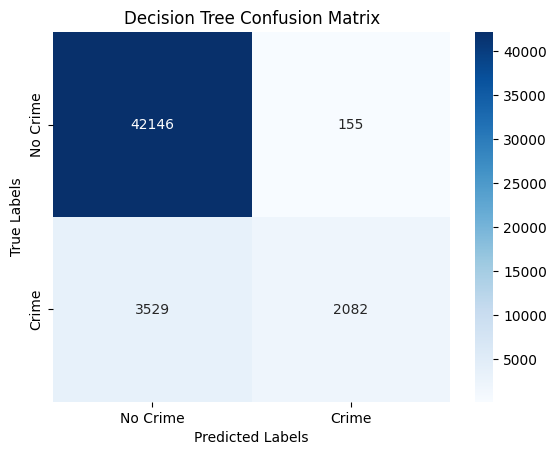

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Instantiate the Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)

# Fit the model
dt.fit(X_train, y_train)

# Predict the Test set results
y_pred_dt = dt.predict(X_test)

# Evaluation Metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Print Metrics
print(f"Decision Tree - Accuracy: {accuracy_dt:.2f}")
print(f"Decision Tree - Precision: {precision_dt:.2f}")
print(f"Decision Tree - Recall: {recall_dt:.2f}")
print(f"Decision Tree - F1 Score: {f1_dt:.2f}")
print("Decision Tree - Confusion Matrix:")
print(conf_matrix_dt)

# Visualize Confusion Matrix
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", xticklabels=["No Crime", "Crime"], yticklabels=["No Crime", "Crime"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Decision Tree Confusion Matrix")
plt.show()

### SVM

SVM - Accuracy: 0.92
SVM - Precision: 0.93
SVM - Recall: 0.37
SVM - F1 Score: 0.53
SVM - Confusion Matrix:
[[42146   155]
 [ 3529  2082]]


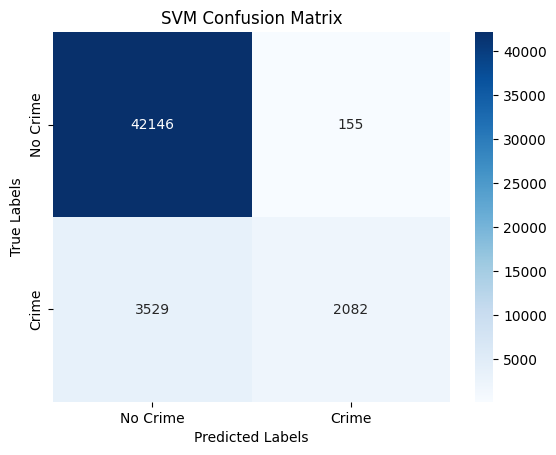

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm_model = SVC(kernel='linear')  
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_dt)
precision_svm = precision_score(y_test, y_pred_dt)
recall_svm = recall_score(y_test, y_pred_dt)
f1_svm = f1_score(y_test, y_pred_dt)
conf_matrix_svm = confusion_matrix(y_test, y_pred_dt)

print(f"SVM - Accuracy: {accuracy_dt:.2f}")
print(f"SVM - Precision: {precision_dt:.2f}")
print(f"SVM - Recall: {recall_dt:.2f}")
print(f"SVM - F1 Score: {f1_dt:.2f}")
print("SVM - Confusion Matrix:")
print(conf_matrix_svm)

sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", xticklabels=["No Crime", "Crime"], yticklabels=["No Crime", "Crime"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("SVM Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

### KNN

KNN - Accuracy: 0.90
KNN - Precision: 0.89
KNN - Recall: 0.90
KNN - F1 Score: 0.88
KNN - Confusion Matrix:
[[41765   536]
 [ 4156  1455]]


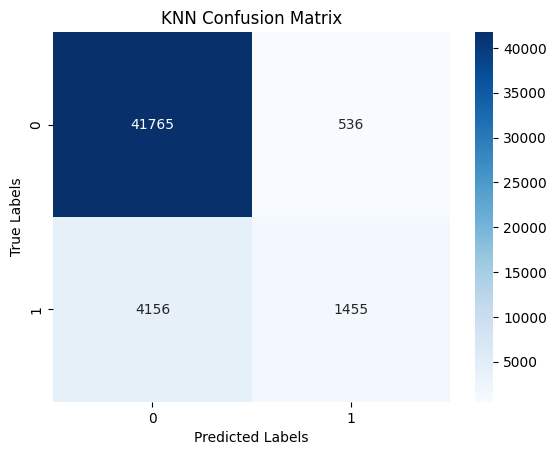

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     42301
         1.0       0.73      0.26      0.38      5611

    accuracy                           0.90     47912
   macro avg       0.82      0.62      0.66     47912
weighted avg       0.89      0.90      0.88     47912



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=494)        #best k value

knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn,average='weighted')
recall_knn = recall_score(y_test, y_pred_knn,average='weighted')
f1_knn = f1_score(y_test, y_pred_knn,average='weighted')
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(f"KNN - Accuracy: {accuracy:.2f}")
print(f"KNN - Precision: {precision_knn:.2f}")
print(f"KNN - Recall: {recall_knn:.2f}")
print(f"KNN - F1 Score: {f1_knn:.2f}")
print("KNN - Confusion Matrix:")
print(conf_matrix_knn)

sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("KNN Confusion Matrix")
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


In [ ]:
from sklearn.model_selection import cross_val_score

# try different values of k
k_values = range(480, 500)                   #with this range the running time will be more than an hour...:) change it to (490,500) for best k value
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    accuracy_scores.append(scores.mean())

# find the best k
best_k = k_values[np.argmax(accuracy_scores)]
print("Best k:", best_k)

knn_optimized = KNeighborsClassifier(n_neighbors=best_k)
knn_optimized.fit(X_train_scaled, y_train)

y_pred_optimized = knn_optimized.predict(X_test_scaled)

accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print("Optimized KNN - Accuracy:", accuracy_optimized)


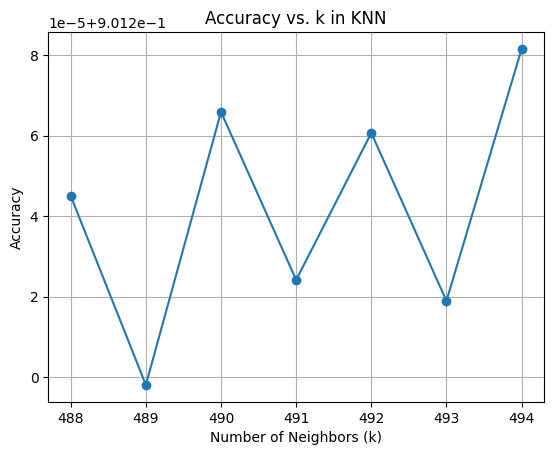

In [ ]:
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k in KNN')
plt.grid()
plt.show()
